### This is the Jupyter Notebook for the Titanic Dataset Assignment Part II

#### Imports

In [86]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Reading Dataset

In [87]:
full_data = pd.read_csv("C:\\Users\\nicke\\Downloads\\AI_CS411\\titanic.csv")
full_data = full_data.drop(columns=[ 'PassengerId', 'Embarked', 'SibSp', 'Parch', 'Name', 'Ticket', 'Cabin'])
full_data = full_data.dropna()

full_data = pd.get_dummies(full_data, columns=['Sex'], drop_first=True)
print(full_data.columns)



Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_male'], dtype='object')


#### Manipulate Features

In [88]:
inputs = ['Age', 'Sex_male', 'Fare', 'Pclass']

X = full_data[inputs].values
y = full_data['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#### Create lists to store data

In [89]:
# Create a list of accuracies to store the results
accuracies = []
val_acc = []
# Dictionary to hold val_accuracy history for each activation
val_accuracies_per_activation = {}
# Create a list of loss to store the results
losses = []
#to hold actual activation functions
act_fun = []

# Create a list of val_loss to store the results
val_losses_per_epoch = []
# Dictionary to hold val_loss history for each activation
val_losses_per_activation = {}
# Create a list of epochs to store the results
epochs = []
# Dictionary to hold epoch history for each activation
epochs_per_activation = {}
# Create a list of optimizers to store the results

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (571, 4)
y_train shape:  (571,)


#### Use activation function: tanh to create the FFNN. 

Epoch 1/50


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4627 - loss: 0.7463 - val_accuracy: 0.7130 - val_loss: 0.6219
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.6229 - val_accuracy: 0.7739 - val_loss: 0.5538
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.5483 - val_accuracy: 0.7739 - val_loss: 0.5219
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8028 - loss: 0.5031 - val_accuracy: 0.7826 - val_loss: 0.5048
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.5113 - val_accuracy: 0.7826 - val_loss: 0.4935
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.5051 - val_accuracy: 0.7826 - val_loss: 0.4861
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4752 - val_accuracy: 0.7826 - val_loss: 0.4812
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7897 - loss: 0.4724 - val_accuracy: 0.7826 - val_loss: 0.4768
Epo

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

76482/76482 ━━━━━━━━━━━━━━━━━━━━ 173s 2ms/step


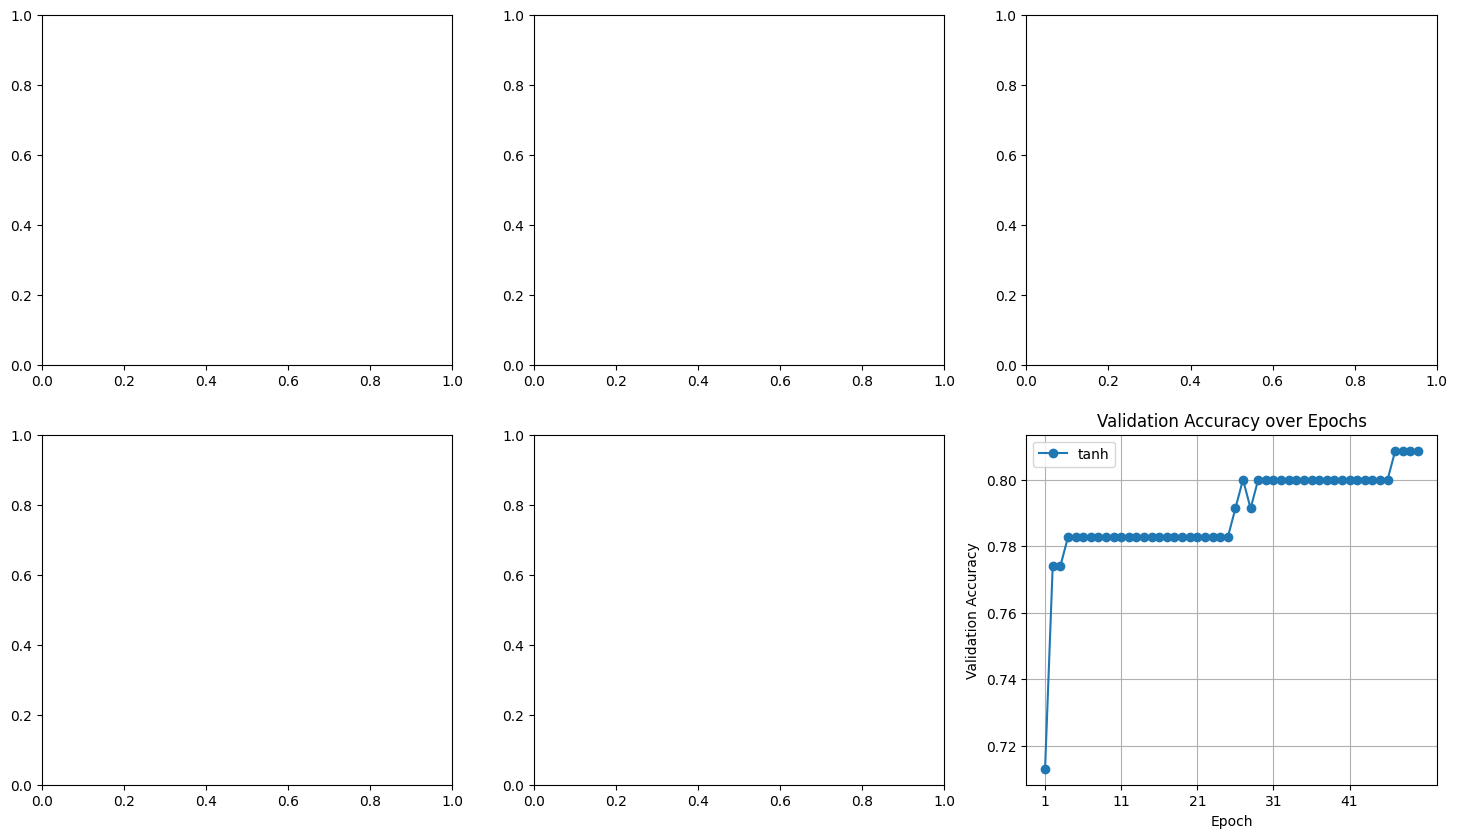

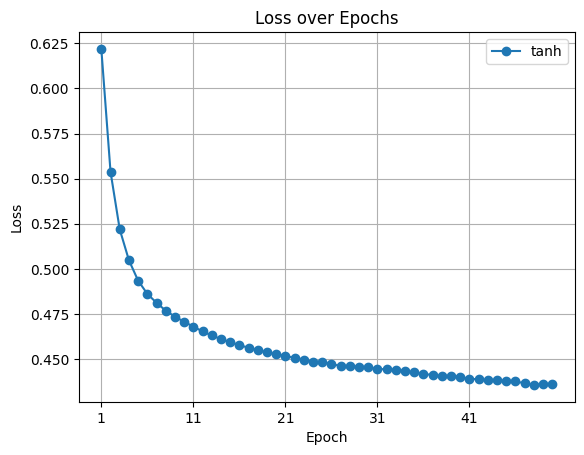

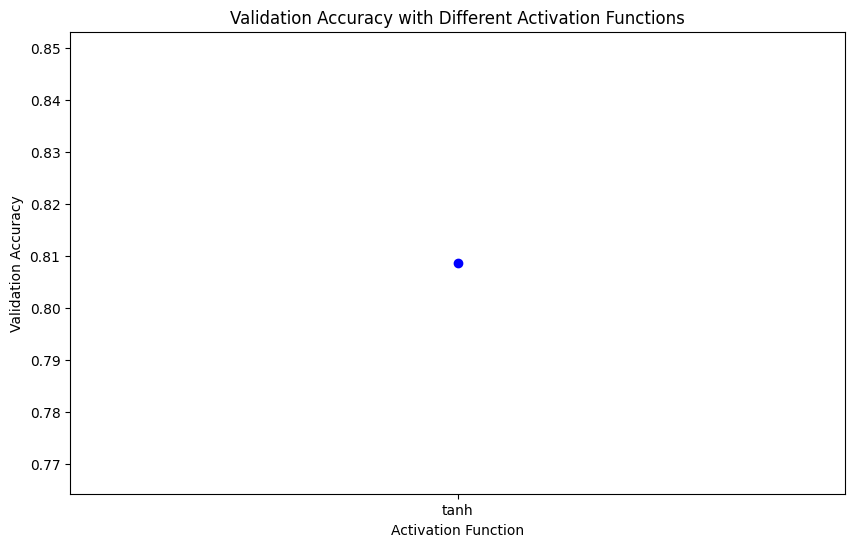

In [90]:
activation = "tanh"

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]




    # Create the model (Sequential means layers are stacked one after another)
myModel = Sequential()

    # Add layers to the model
myModel.add(Dense(10, input_dim=X_train.shape[1], activation=activation))
myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
act_fun.append(activation)


    # Add the output layer
myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
myModel.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate = 0.01), metrics=['accuracy'])

    # Train the model
history = myModel.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose = 1)


    # Evaluate the model
loss, accuracy = myModel.evaluate(X_test, y_test)
accuracies.append(accuracy)
losses.append(loss)
val_acc.append(history.history['val_accuracy'][-1])

val_accuracies_per_activation[activation] = history.history['val_accuracy']
val_losses_per_activation[activation] = history.history['val_loss']
epochs_per_activation[activation] = history.epoch
epochs.append(history.epoch[-1])

    
myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
mean_vals = X_train.mean(axis=0)
grid_full = np.tile(mean_vals, (grid.shape[0], 1))
grid_full[:, 0] = grid[:, 0]  # Age
grid_full[:, 1] = grid[:, 1]  # Fare

# Predict on mesh grid
scaled_grid = scaler.transform(grid_full)
Z = myModel.predict(scaled_grid, verbose=1)
Z = Z.reshape(xx.shape)






for activation in val_accuracies_per_activation.keys():
    # Plot the decision boundary   

    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], marker='o', label=f'{activation}')
    

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


#plot loss curve over epochs
for activation in val_losses_per_activation.keys():
    plt.plot(range(1, 50 + 1), val_losses_per_activation[activation], marker='o', label=f'{activation}')

plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()



# Plot the results

plt.figure(figsize=(10, 6))
plt.plot(activation, val_acc, marker='o', linestyle='-', color='b', label='Validation Accuracy')
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Validation Accuracy')
plt.show()



## As a result: 

### Batch Size (learning_rate = 0.01)

##### Using a batch size of 9 made it reasonable to compute, as we are using one activation function. There are 50 epochs, and overtime, the accuracy increases per epoch. Messing with the hyperparameter may make this neural network better. The accuracy is 0.81. 

##### When the batch size is 20, accuracy went down (at around 0.76), and this is to be expected, as the FFNN has less chances to change it's accuracy.

##### When the batch size is 5, accuracy increases greater than a batch size of 9 (at around 0.83), however, a batch size this small means that the model has slower convergence, increased variance in parameter updates, and potential over-fitting. 


##### So, ultimately, a small or an overly-high batch size increases convergence rate and volatility within the graphs. It may over-fit, update too quickly, update not enough (updating accuracy/loss per batch)  

### Learning Rate (batch_size = 10)

##### Using a learning rate is 0.2, there are more spikes in the loss and accuracy graphs. This indicates a non-stable runtime. A learning rate of 0.2 is too high to receive accurate data. 

##### Using a learning rate of 0.001, there are no spikes in the loss graph, it is a perfect curve downward. However, in the accuracy graph, the accuracy jumps to 0.8 for 5 or so epochs at the start, then goes DOWN to 0.78. As epochs come and go, the accuracy should go up, not down. The convergence value is high, with the accuracy staying put for most of the epochs. 

##### Using a learning rate of 0.01, there are no spikes in either graph. The accuracy sits at 0.8 and it's convergence value is normal, it doesn't sit until late in the epochs. The loss per epoch graph is a perfect curve downward. 

#### Ultimately, if the learning rate is too high, it may skip over data, create noisy graphs, or produce poor accuracy. If the learning rate is too low, it may be very slow at training, it may waste resources (time and money), and there's a risk of over-fitting. 








## Batch size comparisons

Epoch 1/50


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7430 - loss: 0.5870 - val_accuracy: 0.7739 - val_loss: 0.5317
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7857 - loss: 0.5090 - val_accuracy: 0.7826 - val_loss: 0.5059
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7730 - loss: 0.5246 - val_accuracy: 0.7826 - val_loss: 0.4881
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7778 - loss: 0.4842 - val_accuracy: 0.7826 - val_loss: 0.4792
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7955 - loss: 0.4730 - val_accuracy: 0.7826 - val_loss: 0.4732
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.5147 - val_accuracy: 0.7826 - val_loss: 0.4691
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7904 - loss: 0.4734 - val_accuracy: 0.7826 - val_loss: 0.4634
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7885 - loss: 0.4776 - val_accuracy: 0.7826 - val_loss: 0.4600
Epo

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

76482/76482 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step


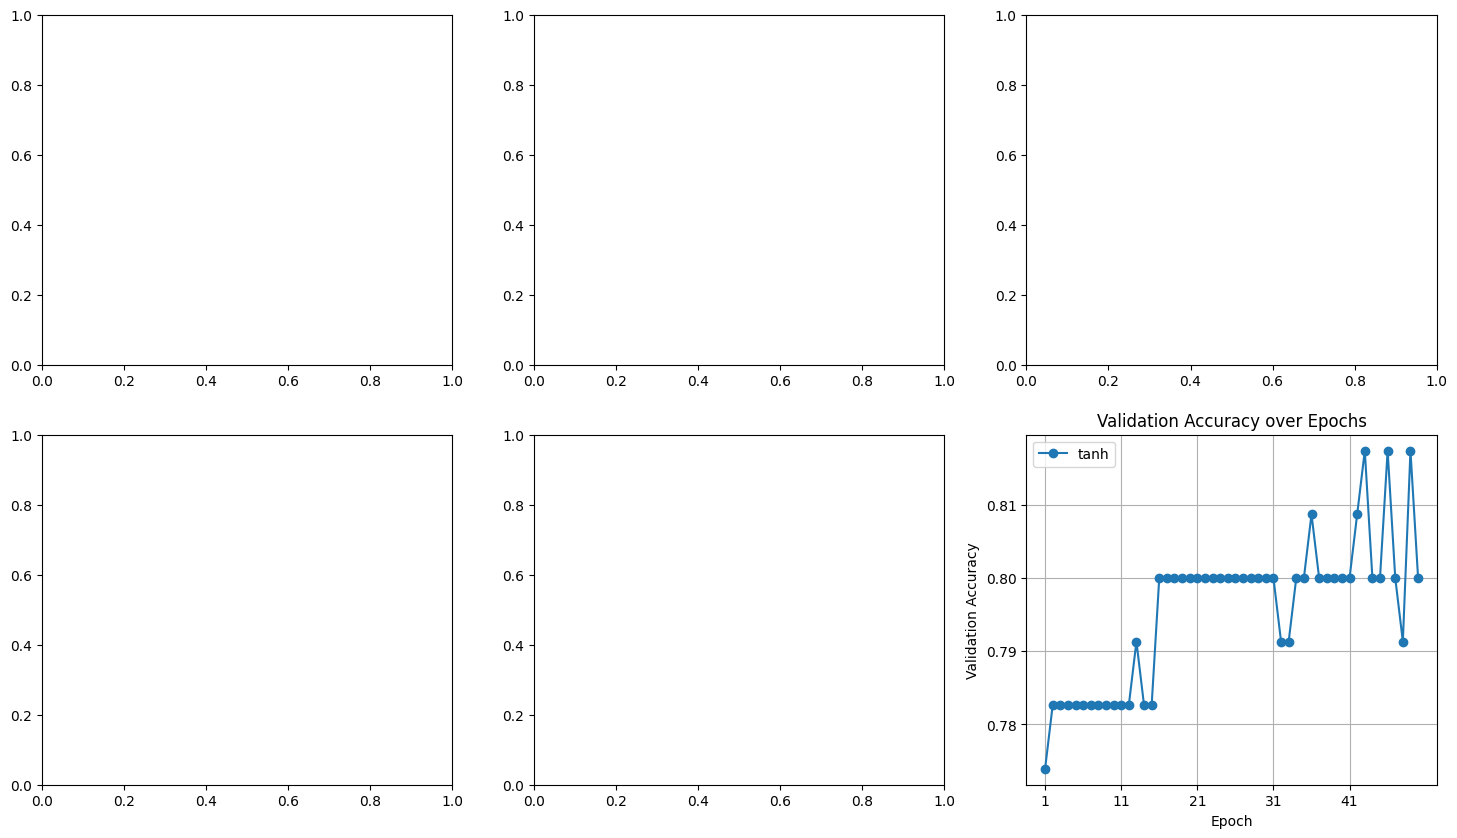

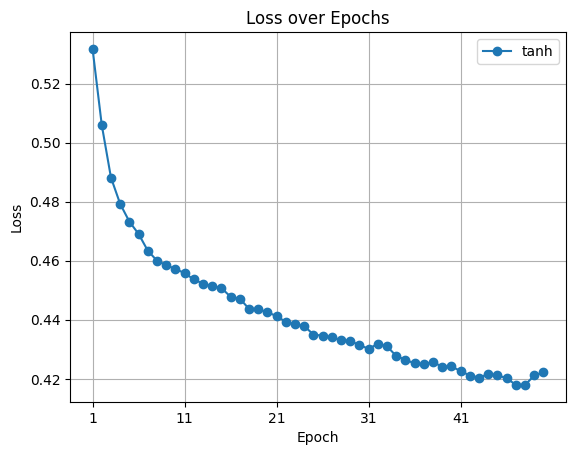

In [91]:
# BATCH SIZE = 5, EPOCHS = 50, LEARNING RATE = 0.01, OPTIMIZER = SGD

activation = "tanh"

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]




    # Create the model (Sequential means layers are stacked one after another)
myModel = Sequential()

    # Add layers to the model
myModel.add(Dense(10, input_dim=X_train.shape[1], activation=activation))
myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
act_fun.append(activation)


    # Add the output layer
myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
myModel.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate = 0.01), metrics=['accuracy'])

    # Train the model
history = myModel.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose = 1)


    # Evaluate the model
loss, accuracy = myModel.evaluate(X_test, y_test)
accuracies.append(accuracy)
losses.append(loss)
val_acc.append(history.history['val_accuracy'][-1])

val_accuracies_per_activation[activation] = history.history['val_accuracy']
val_losses_per_activation[activation] = history.history['val_loss']
epochs_per_activation[activation] = history.epoch
epochs.append(history.epoch[-1])

    
myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
mean_vals = X_train.mean(axis=0)
grid_full = np.tile(mean_vals, (grid.shape[0], 1))
grid_full[:, 0] = grid[:, 0]  # Age
grid_full[:, 1] = grid[:, 1]  # Fare

# Predict on mesh grid
scaled_grid = scaler.transform(grid_full)
Z = myModel.predict(scaled_grid, verbose=1)
Z = Z.reshape(xx.shape)






for activation in val_accuracies_per_activation.keys():
    # Plot the decision boundary   

    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], marker='o', label=f'{activation}')
    

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


#plot loss curve over epochs
for activation in val_losses_per_activation.keys():
    plt.plot(range(1, 50 + 1), val_losses_per_activation[activation], marker='o', label=f'{activation}')

plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3014 - loss: 0.7878 - val_accuracy: 0.4609 - val_loss: 0.7243
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4681 - loss: 0.7363 - val_accuracy: 0.6348 - val_loss: 0.6902
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6324 - loss: 0.6910 - val_accuracy: 0.6435 - val_loss: 0.6628
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6204 - loss: 0.6776 - val_accuracy: 0.7043 - val_loss: 0.6398
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6519 - loss: 0.6577 - val_accuracy: 0.7304 - val_loss: 0.6201
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6719 - loss: 0.6292 - val_accuracy: 0.7391 - val_loss: 0.6029
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6922 - loss: 0.6041 - val_accuracy: 0.7304 - val_loss: 0.5877
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6707 - loss: 0.6069 - val_accuracy: 0.7391 - val_loss: 0.57

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

76482/76482 ━━━━━━━━━━━━━━━━━━━━ 59s 771us/step


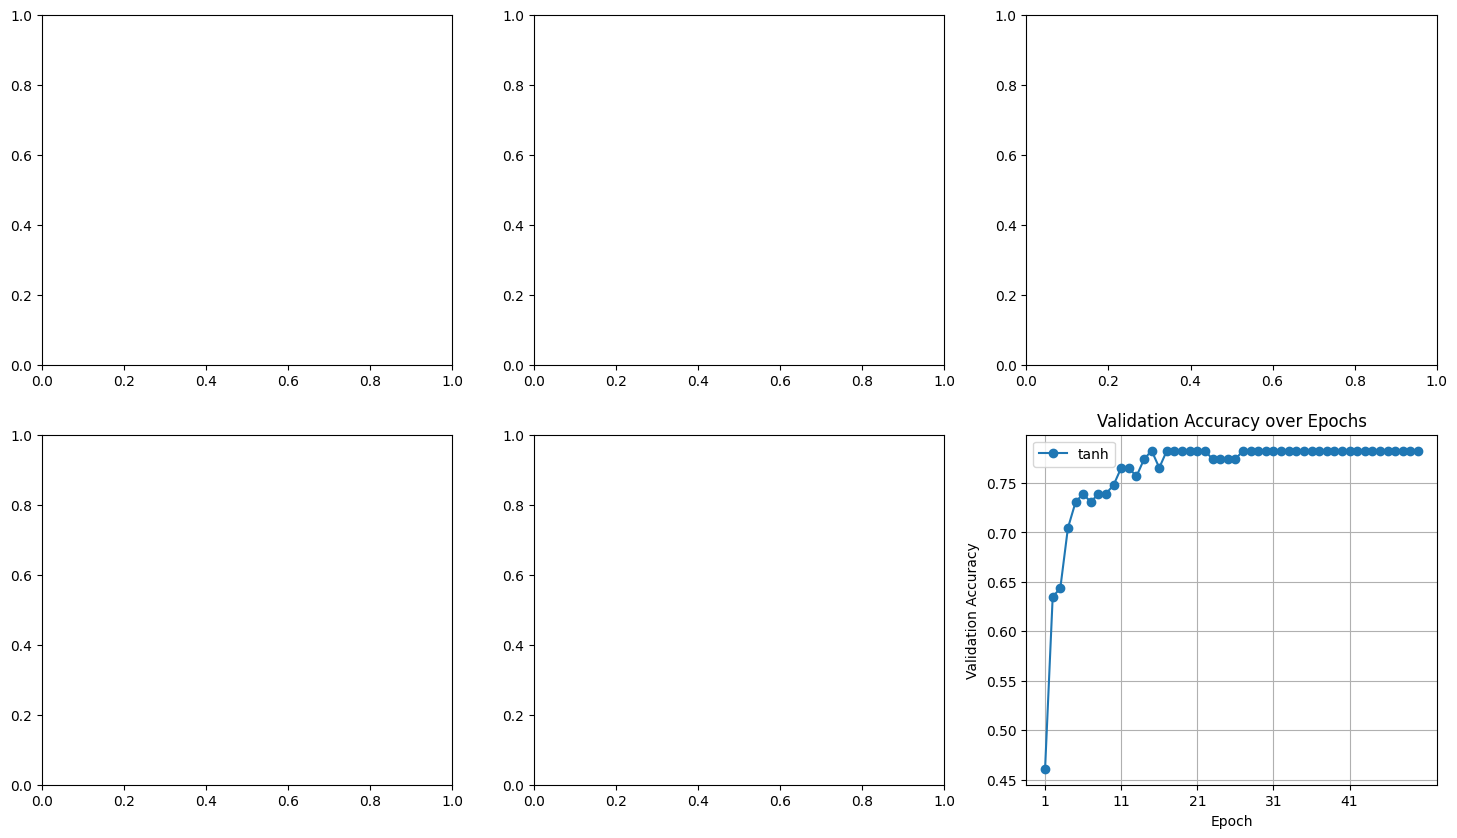

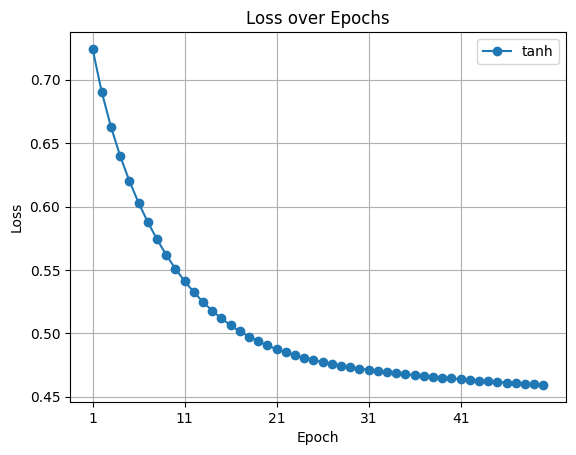

In [92]:
#Batch size = 20, epochs = 50, learning rate = 0.01, optimizer = SGD

activation = "tanh"

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]




    # Create the model (Sequential means layers are stacked one after another)
myModel = Sequential()

    # Add layers to the model
myModel.add(Dense(10, input_dim=X_train.shape[1], activation=activation))
myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
act_fun.append(activation)


    # Add the output layer
myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
myModel.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate = 0.01), metrics=['accuracy'])

    # Train the model
history = myModel.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2, verbose = 1)


    # Evaluate the model
loss, accuracy = myModel.evaluate(X_test, y_test)
accuracies.append(accuracy)
losses.append(loss)
val_acc.append(history.history['val_accuracy'][-1])

val_accuracies_per_activation[activation] = history.history['val_accuracy']
val_losses_per_activation[activation] = history.history['val_loss']
epochs_per_activation[activation] = history.epoch
epochs.append(history.epoch[-1])

    
myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
mean_vals = X_train.mean(axis=0)
grid_full = np.tile(mean_vals, (grid.shape[0], 1))
grid_full[:, 0] = grid[:, 0]  # Age
grid_full[:, 1] = grid[:, 1]  # Fare

# Predict on mesh grid
scaled_grid = scaler.transform(grid_full)
Z = myModel.predict(scaled_grid, verbose=1)
Z = Z.reshape(xx.shape)






for activation in val_accuracies_per_activation.keys():
    # Plot the decision boundary   

    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], marker='o', label=f'{activation}')
    

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


#plot loss curve over epochs
for activation in val_losses_per_activation.keys():
    plt.plot(range(1, 50 + 1), val_losses_per_activation[activation], marker='o', label=f'{activation}')

plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


## Learning rate comparisons

Epoch 1/50


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3194 - loss: 0.8144 - val_accuracy: 0.3391 - val_loss: 0.7978
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 0.7938 - val_accuracy: 0.3652 - val_loss: 0.7754
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4029 - loss: 0.7521 - val_accuracy: 0.4348 - val_loss: 0.7548
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3880 - loss: 0.7532 - val_accuracy: 0.4522 - val_loss: 0.7359
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4151 - loss: 0.7269 - val_accuracy: 0.4957 - val_loss: 0.7182
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4528 - loss: 0.7145 - val_accuracy: 0.5217 - val_loss: 0.7020
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4421 - loss: 0.7074 - val_accuracy: 0.5217 - val_loss: 0.6870
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.6807 - val_accuracy: 0.5826 - val_loss: 0.6729
Epo

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_71 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

76482/76482 ━━━━━━━━━━━━━━━━━━━━ 59s 774us/step


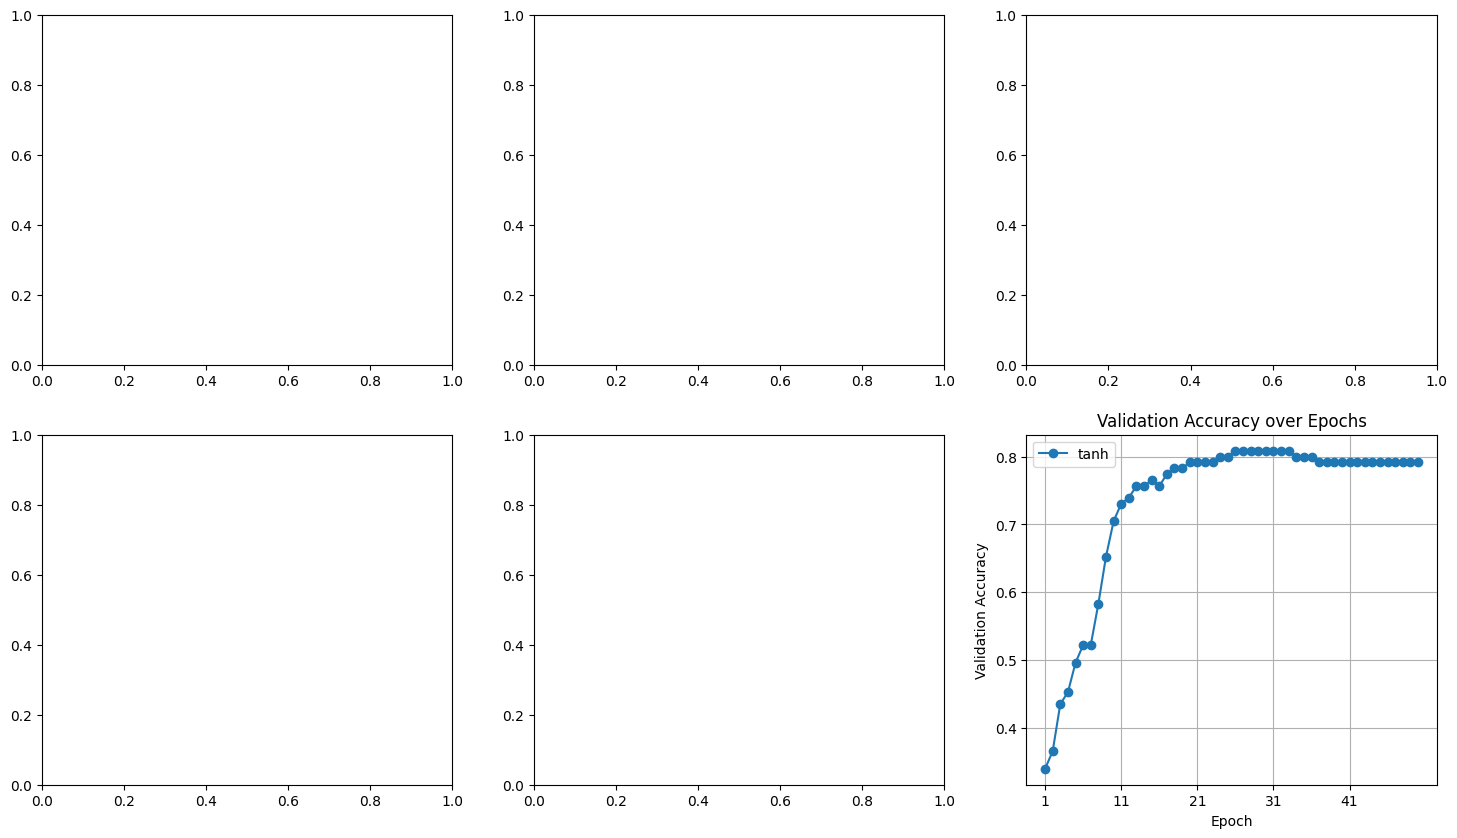

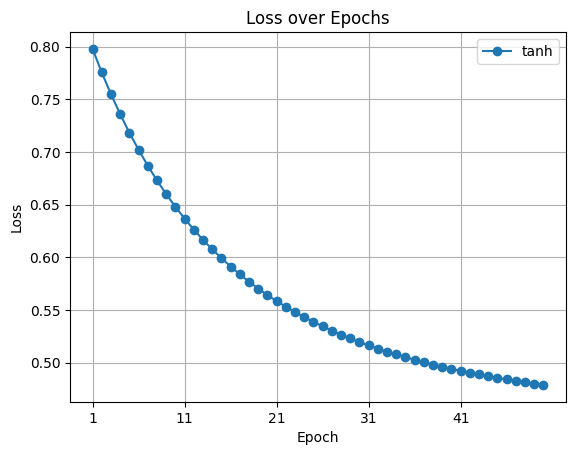

In [93]:
# Batch size = 10, epochs = 50, learning rate = 0.001, optimizer = SGD
activation = "tanh"

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]




    # Create the model (Sequential means layers are stacked one after another)
myModel = Sequential()

    # Add layers to the model
myModel.add(Dense(10, input_dim=X_train.shape[1], activation=activation))
myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
act_fun.append(activation)


    # Add the output layer
myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
myModel.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate = 0.001), metrics=['accuracy'])

    # Train the model
history = myModel.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose = 1)


    # Evaluate the model
loss, accuracy = myModel.evaluate(X_test, y_test)
accuracies.append(accuracy)
losses.append(loss)
val_acc.append(history.history['val_accuracy'][-1])

val_accuracies_per_activation[activation] = history.history['val_accuracy']
val_losses_per_activation[activation] = history.history['val_loss']
epochs_per_activation[activation] = history.epoch
epochs.append(history.epoch[-1])

    
myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
mean_vals = X_train.mean(axis=0)
grid_full = np.tile(mean_vals, (grid.shape[0], 1))
grid_full[:, 0] = grid[:, 0]  # Age
grid_full[:, 1] = grid[:, 1]  # Fare

# Predict on mesh grid
scaled_grid = scaler.transform(grid_full)
Z = myModel.predict(scaled_grid, verbose=1)
Z = Z.reshape(xx.shape)






for activation in val_accuracies_per_activation.keys():
    # Plot the decision boundary   

    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], marker='o', label=f'{activation}')
    

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


#plot loss curve over epochs
for activation in val_losses_per_activation.keys():
    plt.plot(range(1, 50 + 1), val_losses_per_activation[activation], marker='o', label=f'{activation}')

plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


c:\Users\nicke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7227 - loss: 0.5496 - val_accuracy: 0.7826 - val_loss: 0.4592
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.4724 - val_accuracy: 0.7826 - val_loss: 0.4542
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.5035 - val_accuracy: 0.8087 - val_loss: 0.4391
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7882 - loss: 0.4640 - val_accuracy: 0.8000 - val_loss: 0.4355
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7741 - loss: 0.4734 - val_accuracy: 0.7826 - val_loss: 0.4375
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7533 - loss: 0.4849 - val_accuracy: 0.8000 - val_loss: 0.4347
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7658 - loss: 0.4779 - val_accuracy: 0.8087 - val_loss: 0.4293
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - loss: 0.4900 - val_accuracy: 0.8000 - val_loss: 0.4319
Epo

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_74 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (456.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

76482/76482 ━━━━━━━━━━━━━━━━━━━━ 56s 733us/step


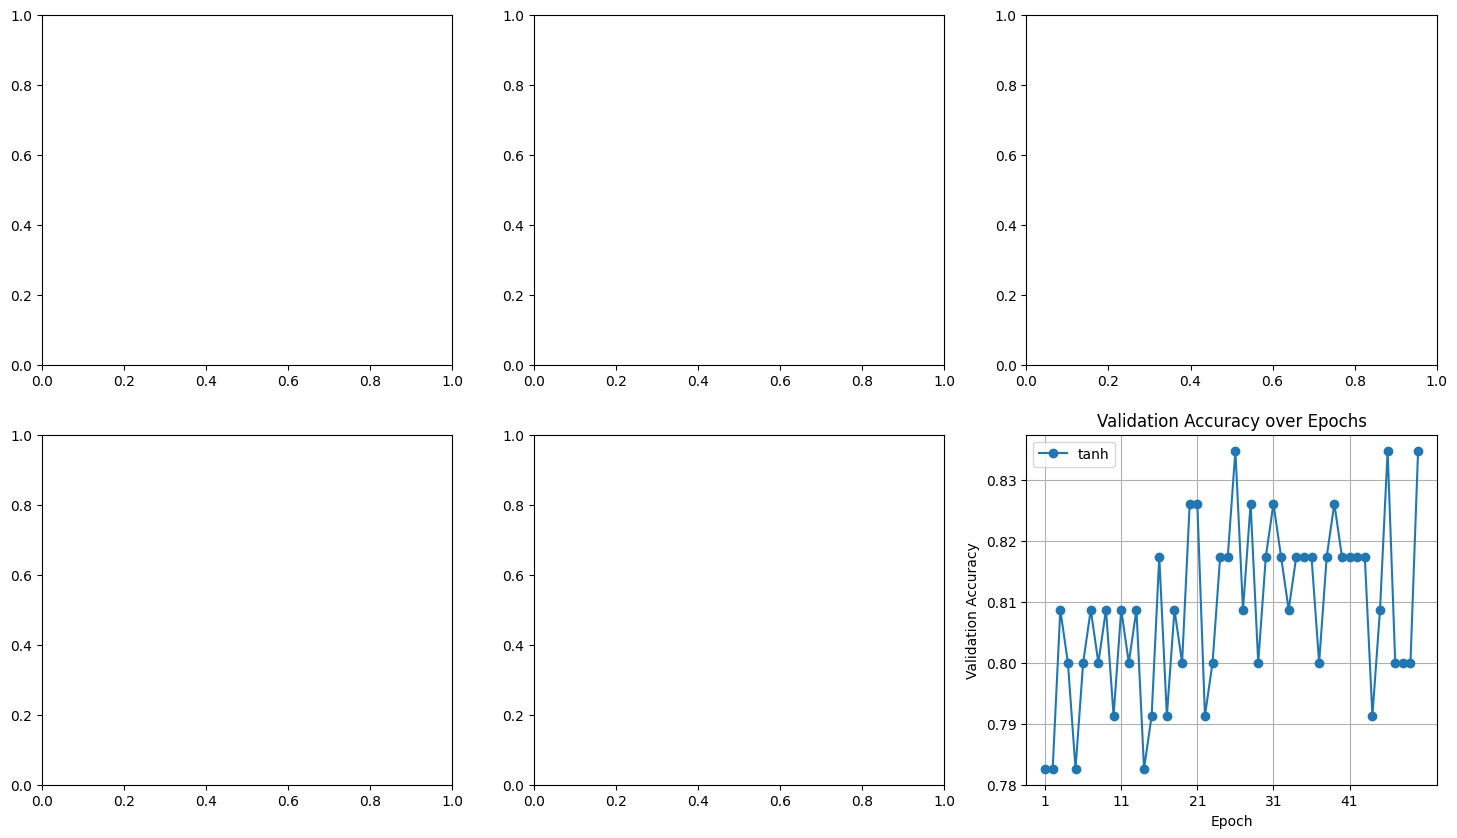

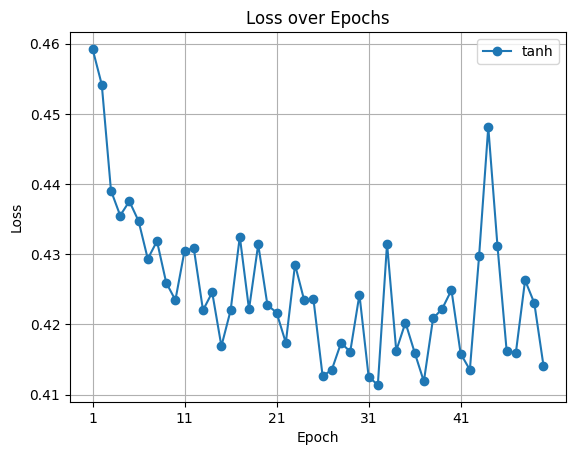

In [94]:
# Batch size = 10, epochs = 50, learning rate = 0.2, optimizer = SGD
activation = "tanh"

# Set up plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()  # Flatten 2D subplot grid into 1D

# Meshgrid setup
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]




    # Create the model (Sequential means layers are stacked one after another)
myModel = Sequential()

    # Add layers to the model
myModel.add(Dense(10, input_dim=X_train.shape[1], activation=activation))
myModel.add(Dense(5, activation=activation))
    # add the activation function used to the list
act_fun.append(activation)


    # Add the output layer
myModel.add(Dense(1, activation='sigmoid'))

    # Compile the model
myModel.compile(loss='binary_crossentropy', optimizer= SGD(learning_rate = 0.2), metrics=['accuracy'])

    # Train the model
history = myModel.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose = 1)


    # Evaluate the model
loss, accuracy = myModel.evaluate(X_test, y_test)
accuracies.append(accuracy)
losses.append(loss)
val_acc.append(history.history['val_accuracy'][-1])

val_accuracies_per_activation[activation] = history.history['val_accuracy']
val_losses_per_activation[activation] = history.history['val_loss']
epochs_per_activation[activation] = history.epoch
epochs.append(history.epoch[-1])

    
myModel.summary()

    # Fill grid with dummy values for other features
    #grid_full = np.zeros((grid.shape[0], x_train.shape[1]))
mean_vals = X_train.mean(axis=0)
grid_full = np.tile(mean_vals, (grid.shape[0], 1))
grid_full[:, 0] = grid[:, 0]  # Age
grid_full[:, 1] = grid[:, 1]  # Fare

# Predict on mesh grid
scaled_grid = scaler.transform(grid_full)
Z = myModel.predict(scaled_grid, verbose=1)
Z = Z.reshape(xx.shape)






for activation in val_accuracies_per_activation.keys():
    # Plot the decision boundary   

    plt.plot(range(1, 50 + 1), val_accuracies_per_activation[activation], marker='o', label=f'{activation}')
    

plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()


#plot loss curve over epochs
for activation in val_losses_per_activation.keys():
    plt.plot(range(1, 50 + 1), val_losses_per_activation[activation], marker='o', label=f'{activation}')

plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, 50 + 1, 10))
plt.legend()
plt.grid(True)
plt.show()
